# US logistic details operations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time
import datetime
import math

In [3]:
FILES = 'Dataset/logistics_shipments_dataset.csv'

## Dataset exploration

In [4]:
df = pd.read_csv(FILES)

In [5]:
df

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,SH11995,Warehouse_BOS,San Francisco,FedEx,2023-01-18,2023-01-23,7.9,217.78,Delivered,1616,5
1996,SH11996,Warehouse_HOU,Phoenix,UPS,2023-10-27,2023-11-01,36.5,279.47,Delivered,1708,5
1997,SH11997,Warehouse_HOU,Portland,LaserShip,2023-02-13,2023-02-19,11.4,250.32,Delivered,1912,6
1998,SH11998,Warehouse_SEA,Detroit,USPS,2023-10-17,2023-10-22,10.9,272.31,Delivered,2188,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [7]:
df.dtypes

Shipment_ID          object
Origin_Warehouse     object
Destination          object
Carrier              object
Shipment_Date        object
Delivery_Date        object
Weight_kg           float64
Cost                float64
Status               object
Distance_miles        int64
Transit_Days          int64
dtype: object

In [8]:
df['Shipment_Date_time'] = pd.to_datetime(df['Shipment_Date'])

In [9]:
df

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Shipment_Date_time
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2,2023-10-02
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3,2023-12-06
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2,2023-09-18
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9,2023-01-26
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3,2023-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SH11995,Warehouse_BOS,San Francisco,FedEx,2023-01-18,2023-01-23,7.9,217.78,Delivered,1616,5,2023-01-18
1996,SH11996,Warehouse_HOU,Phoenix,UPS,2023-10-27,2023-11-01,36.5,279.47,Delivered,1708,5,2023-10-27
1997,SH11997,Warehouse_HOU,Portland,LaserShip,2023-02-13,2023-02-19,11.4,250.32,Delivered,1912,6,2023-02-13
1998,SH11998,Warehouse_SEA,Detroit,USPS,2023-10-17,2023-10-22,10.9,272.31,Delivered,2188,5,2023-10-17


### Valeurs manquantes

In [10]:
df.isna().sum()

Shipment_ID            0
Origin_Warehouse       0
Destination            0
Carrier                0
Shipment_Date          0
Delivery_Date         32
Weight_kg              0
Cost                  41
Status                 0
Distance_miles         0
Transit_Days           0
Shipment_Date_time     0
dtype: int64

In [11]:
df['Delivery_Date'] = df['Shipment_Date_time']+pd.to_timedelta(df['Transit_Days'],unit='D')

In [12]:
df = df.drop(columns = ['Shipment_Date_time'])

In [13]:
df

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,SH11995,Warehouse_BOS,San Francisco,FedEx,2023-01-18,2023-01-23,7.9,217.78,Delivered,1616,5
1996,SH11996,Warehouse_HOU,Phoenix,UPS,2023-10-27,2023-11-01,36.5,279.47,Delivered,1708,5
1997,SH11997,Warehouse_HOU,Portland,LaserShip,2023-02-13,2023-02-19,11.4,250.32,Delivered,1912,6
1998,SH11998,Warehouse_SEA,Detroit,USPS,2023-10-17,2023-10-22,10.9,272.31,Delivered,2188,5


####  Cost

In [14]:
df['Cost'].median()

196.42

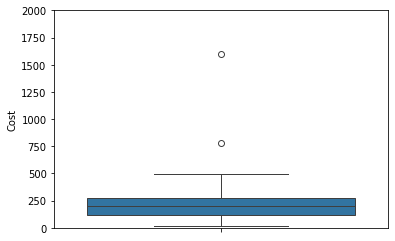

In [15]:
sns.boxplot(df['Cost'])
plt.ylim(0,2000)

plt.show()

In [16]:
df['Cost'] = df['Cost'].fillna(df['Cost'].median())

In [17]:
df.isna().sum()

Shipment_ID         0
Origin_Warehouse    0
Destination         0
Carrier             0
Shipment_Date       0
Delivery_Date       0
Weight_kg           0
Cost                0
Status              0
Distance_miles      0
Transit_Days        0
dtype: int64

In [18]:
df['Cost'].head(73)

0      67.46
1     268.85
2      74.35
3     187.04
4     120.01
       ...  
68    261.81
69    180.20
70     56.51
71    196.42
72    225.74
Name: Cost, Length: 73, dtype: float64

### Valeurs doubles

In [19]:
df['Shipment_ID'].duplicated().sum()

0

In [20]:
df.duplicated('Shipment_ID').sum()

0

In [21]:
#df = df.drop(columns='Shipment_ID')
#df

## Partie SQL 